<a href="https://colab.research.google.com/github/Running-Machine-ML23-2/Extra_credit/blob/main/Extra_credit_split_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 압축 해제**

In [ ]:
from zipfile import ZipFile
import os

# 압축 해제할 파일 경로
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/ts.zip'

# 압축을 해제할 디렉토리 경로
extracted_path = '/content/drive/MyDrive/Colab Notebooks'


# Zip 파일 열기
with ZipFile(zip_file_path, 'r') as zip_ref:
    # 모든 파일을 지정된 디렉토리로 추출
    zip_ref.extractall(extracted_path)

print(f'{zip_file_path} 파일이 성공적으로 압축 해제되었습니다.')


KeyboardInterrupt: ignored



# **데이터 추출**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import random
# 파일 경로 설정
folder_path = "/content/drive/MyDrive/Colab Notebooks/ts/"
output_path = "/content/drive/MyDrive/Colab Notebooks/extra_data_split_4.pkl"

# 데이터를 저장할 리스트
data_list = {'X1': [], 'X2': [], 'y': []}

# 파일 목록 가져오기
file_list = os.listdir(folder_path)
file_list.sort(reverse=True)


In [ ]:

# 파일을 읽어서 데이터 처리
for idx, file_name in enumerate(file_list, start=1):
    if file_name.endswith(".cell"):
        file_path = os.path.join(folder_path, file_name)

        # # 파일 크기가 0바이트인 경우 건너뛰기
        # if os.path.getsize(file_path) == 0 or "join" in file_name or "split_1"  :
        #     continue
        if "split_4" in file_name:
          with open(file_path, "r") as file:
              print(f"Working on file {idx}/{len(file_list)} - {file_name}")
              lines = file.readlines()
              x1_values = []
              x2_values = []
              for line in lines:
                  parts = line.strip().split('\t')
                  x1_values.append(float(parts[0]))
                  x2_values.append(float(parts[2]))

              y = int(file_name.split('-')[0])
              # 데이터를 딕셔너리로 저장
              data_list['X1'].append(x1_values)
              data_list['X2'].append(x2_values)
              data_list['y'].append(y)

df = pd.DataFrame(data_list)

# DataFrame을 pkl 파일로 저장
df.to_pickle(output_path)

print("데이터 전처리 및 저장이 완료되었습니다.")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Working on file 68211/98188 - 35-107_split_4.cell
Working on file 68217/98188 - 35-106_split_4.cell
Working on file 68223/98188 - 35-105_split_4.cell
Working on file 68238/98188 - 35-102_split_4.cell
Working on file 68244/98188 - 35-101_split_4.cell
Working on file 68250/98188 - 35-100_split_4.cell
Working on file 68256/98188 - 35-0_split_4.cell
Working on file 68262/98188 - 34-9_split_4.cell
Working on file 68267/98188 - 34-99_split_4.cell
Working on file 68272/98188 - 34-98_split_4.cell
Working on file 68282/98188 - 34-96_split_4.cell
Working on file 68288/98188 - 34-95_split_4.cell
Working on file 68294/98188 - 34-94_split_4.cell
Working on file 68300/98188 - 34-93_split_4.cell
Working on file 68306/98188 - 34-92_split_4.cell
Working on file 68312/98188 - 34-91_split_4.cell
Working on file 68322/98188 - 34-8_split_4.cell
Working on file 68327/98188 - 34-89_split_4.cell
Working on file 68332/98188 - 34-88_split_4.cell
Working on file 68336/98188 - 





































# **데이터 학습 & 결과**

In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load data from the pickle file
file_path = "/content/drive/MyDrive/Colab Notebooks/Extra_Credit/extra_data_split_4.pkl"
with open(file_path, "rb") as file:
    data = pickle.load(file)

# Separate features (X1, X2) and target variable (y)
X1_mon = data['X1']
X2_mon= (data['X2'])
y = (data['y'])
X1_mon = [[round(float(value), 2) for value in sequence] for sequence in X1_mon]
X2_mon = [[round(float(value), 2) for value in sequence] for sequence in X2_mon]
y = y.tolist()

print(f'Total samples: {len(X1_mon)}')
print(f'Total samples: {len(y)}')

Total samples: 16351
Total samples: 16351


In [2]:
outgoing_packets_fraction = []  # Array to store the outgoing packets fraction for unmonitored data
std_outgoing_packet_ordering = []  # Array to store the standard deviation of outgoing packet ordering for unmonitored data

for i in range(len(X1_mon)):
    outgoing_packets = 0
    packet_ordering = []
    total_packets = len(X1_mon[i])  # Get the total number of packets in X1_mon[i]

    if total_packets > 0:
        for j in range(len(X1_mon[i])):
            if X2_mon[i][j] > 0:
                outgoing_packets += 1
                packet_ordering.append(X1_mon[i][j])

        outgoing_packets_fraction.append(outgoing_packets / total_packets)

        if len(packet_ordering) > 1:  # Check if there is more than one element to calculate std
            std_outgoing_packet_ordering.append(np.std(packet_ordering))
        else:
            std_outgoing_packet_ordering.append(0)  # If only one element, set std_outgoing_packet_ordering to 0
    else:
        outgoing_packets_fraction.append(0)  # If total_packets is 0, set outgoing_packets_fraction to 0
        std_outgoing_packet_ordering.append(0)  # If total_packets is 0, set std_outgoing_packet_ordering to 0


In [3]:
MAX_SEQUENCE_LENGTH = 100  # 시퀀스의 최대 길이

def pad_sequence(seq, max_length):
    if len(seq) < max_length:
        seq += [0] * (max_length - len(seq))  # 패딩
    else:
        seq = seq[:max_length]  # 잘라냄
    return seq

def compute_bursts(sequence, max_length):
    bursts = []

    if len(sequence) == 0:
        return [0] * max_length  # If the sequence is empty, return a list of zeros

    current_burst = sequence[0]

    for size in sequence[1:]:
        if np.sign(size) == np.sign(current_burst):
            current_burst += size
        else:
            bursts.append(current_burst)
            current_burst = size
    bursts.append(current_burst)

    # Pad the bursts to the maximum sequence length
    bursts = pad_sequence(bursts, max_length)

    return bursts

X2_all = X2_mon
X1_all = X1_mon

X2_all = [pad_sequence(x, MAX_SEQUENCE_LENGTH) for x in X2_all]
X1_all = [pad_sequence(x, MAX_SEQUENCE_LENGTH) for x in X1_all]

X_mon_bursts = [compute_bursts(x, MAX_SEQUENCE_LENGTH) for x in X2_mon]

X_mon_cumsum = [pad_sequence(np.cumsum(x).tolist(), MAX_SEQUENCE_LENGTH) for x in X2_mon]

num_packets = [sum(1 for size in instance_sizes if size < 0) for instance_sizes in X2_mon]
X_CAT1 = num_packets
X_CAT2 = outgoing_packets_fraction
X_CAT4 = std_outgoing_packet_ordering

X_CAT1 = np.array(X_CAT1).reshape(-1, 1)
X_CAT2 = np.array(X_CAT2).reshape(-1, 1)
X_CAT4 = np.array(X_CAT4).reshape(-1, 1)


In [4]:
# 피처 목록
features = [X2_all, X1_all, X_mon_bursts, X_mon_cumsum, X_CAT1, X_CAT2, X_CAT4]
feature_names = ['X2_all', 'X1_all', 'X_mon_bursts', 'X_mon_cumsum', 'X_CAT1', 'X_CAT2', 'X_CAT4']  # 피처 이름


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from tqdm import tqdm
from itertools import combinations


# Initialize models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "NN (MLP)": MLPClassifier(random_state=42)
}

# Dictionary to store results for each model
all_results = {model: {} for model in models}

# Loop through each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    best_accuracy = 0.0
    best_subset = None

    # Loop through all feature subsets with tqdm progress bar
    for r in tqdm(range(1, len(features) + 1), desc=f'{model_name} Progress'):
        for subset_indices in tqdm(combinations(range(len(features)), r), desc='Subset Progress', leave=False):
            subset = [features[i] for i in subset_indices]
            subset_names = [feature_names[i] for i in subset_indices]

            X = np.concatenate([np.array(feature) for feature in subset], axis=1)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)

            # Update best subset if current accuracy is higher
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_subset = subset_names

            # Store accuracy for the current subset
            all_results[model_name][tuple(subset_names)] = accuracy

    # Print the best subset and accuracy for each model
    print(f"\nBest subset for {model_name}: {best_subset}")
    print(f"Best accuracy: {best_accuracy:.3f}")




Training KNN...


KNN Progress:   0%|          | 0/7 [00:00<?, ?it/s]
Subset Progress: 0it [00:00, ?it/s]
Subset Progress: 1it [00:01,  1.46s/it]
Subset Progress: 2it [00:02,  1.40s/it]
Subset Progress: 3it [00:04,  1.47s/it]
Subset Progress: 4it [00:05,  1.40s/it]
Subset Progress: 5it [00:05,  1.04it/s]
Subset Progress: 6it [00:06,  1.39it/s]
Subset Progress: 7it [00:06,  1.75it/s]
KNN Progress:  14%|█▍        | 1/7 [00:06<00:38,  6.39s/it]
Subset Progress: 0it [00:00, ?it/s]
Subset Progress: 1it [00:01,  1.25s/it]
Subset Progress: 2it [00:02,  1.27s/it]
Subset Progress: 3it [00:03,  1.26s/it]
Subset Progress: 4it [00:04,  1.08s/it]
Subset Progress: 5it [00:05,  1.04it/s]
Subset Progress: 6it [00:06,  1.11it/s]
Subset Progress: 7it [00:07,  1.02s/it]
Subset Progress: 8it [00:08,  1.08s/it]
Subset Progress: 9it [00:09,  1.00s/it]
Subset Progress: 10it [00:10,  1.11s/it]
Subset Progress: 11it [00:12,  1.17s/it]
Subset Progress: 12it [00:14,  1.54s/it]
Subset Progress: 13it [00:16,  1.55s/it]
Subset Progr


Best subset for KNN: ['X1_all', 'X_CAT2', 'X_CAT4']
Best accuracy: 0.034

Training Decision Tree...


Decision Tree Progress:   0%|          | 0/7 [00:00<?, ?it/s]
Subset Progress: 0it [00:00, ?it/s]
Subset Progress: 1it [00:00,  1.43it/s]
Subset Progress: 2it [00:06,  3.48s/it]
Subset Progress: 3it [00:07,  2.37s/it]
Subset Progress: 4it [00:07,  1.68s/it]
Subset Progress: 6it [00:07,  1.22it/s]
Decision Tree Progress:  14%|█▍        | 1/7 [00:07<00:47,  8.00s/it]
Subset Progress: 0it [00:00, ?it/s]
Subset Progress: 1it [00:04,  4.67s/it]
Subset Progress: 2it [00:06,  2.85s/it]
Subset Progress: 3it [00:07,  2.12s/it]
Subset Progress: 4it [00:08,  1.50s/it]
Subset Progress: 5it [00:08,  1.18s/it]
Subset Progress: 6it [00:09,  1.00s/it]
Subset Progress: 7it [00:17,  3.46s/it]
Subset Progress: 8it [00:23,  4.04s/it]
Subset Progress: 9it [00:27,  4.28s/it]
Subset Progress: 10it [00:33,  4.62s/it]
Subset Progress: 11it [00:37,  4.39s/it]
Subset Progress: 12it [00:39,  3.65s/it]
Subset Progress: 13it [00:40,  2.96s/it]
Subset Progress: 14it [00:41,  2.40s/it]
Subset Progress: 15it [00:42,  


Best subset for Decision Tree: ['X2_all', 'X1_all', 'X_mon_bursts', 'X_mon_cumsum', 'X_CAT2']
Best accuracy: 0.040

Training Random Forest...


Random Forest Progress:   0%|          | 0/7 [00:00<?, ?it/s]
Subset Progress: 0it [00:00, ?it/s]
Subset Progress: 1it [00:05,  5.09s/it]
Subset Progress: 2it [00:40, 22.70s/it]
Subset Progress: 3it [00:50, 17.28s/it]
Subset Progress: 4it [00:59, 13.70s/it]
Subset Progress: 5it [01:03, 10.46s/it]
Subset Progress: 6it [01:08,  8.59s/it]
Subset Progress: 7it [01:19,  9.12s/it]
Random Forest Progress:  14%|█▍        | 1/7 [01:19<07:54, 79.07s/it]
Subset Progress: 0it [00:00, ?it/s]
Subset Progress: 1it [00:31, 31.98s/it]
Subset Progress: 2it [00:44, 20.75s/it]
Subset Progress: 3it [00:53, 15.26s/it]
Subset Progress: 4it [00:59, 11.61s/it]
Subset Progress: 5it [01:04,  9.05s/it]
Subset Progress: 6it [01:10,  8.19s/it]
Subset Progress: 7it [01:50, 18.43s/it]
Subset Progress: 8it [02:21, 22.57s/it]
Subset Progress: 9it [02:55, 26.21s/it]
Subset Progress: 10it [03:29, 28.50s/it]
Subset Progress: 11it [04:02, 30.01s/it]
Subset Progress: 12it [04:15, 24.78s/it]
Subset Progress: 13it [04:27, 20.


Best subset for Random Forest: ['X2_all', 'X1_all', 'X_mon_bursts', 'X_mon_cumsum', 'X_CAT1']
Best accuracy: 0.053

Training AdaBoost...


AdaBoost Progress:   0%|          | 0/7 [00:00<?, ?it/s]
Subset Progress: 0it [00:00, ?it/s]
Subset Progress: 1it [00:03,  3.39s/it]
Subset Progress: 2it [00:13,  7.49s/it]
Subset Progress: 3it [00:17,  5.83s/it]
Subset Progress: 4it [00:22,  5.27s/it]
Subset Progress: 5it [00:25,  4.61s/it]
Subset Progress: 6it [00:29,  4.26s/it]
Subset Progress: 7it [00:31,  3.66s/it]
AdaBoost Progress:  14%|█▍        | 1/7 [00:31<03:08, 31.48s/it]
Subset Progress: 0it [00:00, ?it/s]
Subset Progress: 1it [00:10, 10.94s/it]
Subset Progress: 2it [00:18,  8.94s/it]
Subset Progress: 3it [00:24,  7.73s/it]
Subset Progress: 4it [00:30,  6.88s/it]
Subset Progress: 5it [00:34,  5.89s/it]
Subset Progress: 6it [00:37,  5.07s/it]
Subset Progress: 7it [00:50,  7.38s/it]
Subset Progress: 8it [01:01,  8.70s/it]
Subset Progress: 9it [01:11,  8.99s/it]
Subset Progress: 10it [01:20,  9.15s/it]
Subset Progress: 11it [01:29,  9.10s/it]
Subset Progress: 12it [01:37,  8.67s/it]
Subset Progress: 13it [01:42,  7.63s/it]
Su


Best subset for AdaBoost: ['X1_all', 'X_mon_cumsum', 'X_CAT1', 'X_CAT2']
Best accuracy: 0.031

Training NN (MLP)...


NN (MLP) Progress:   0%|          | 0/7 [00:00<?, ?it/s]
Subset Progress: 0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(

Subset Progress: 1it [00:57, 57.55s/it]/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(

Subset Progress: 2it [01:54, 57.22s/it]
Subset Progress: 3it [02:52, 57.42s/it]
Subset Progress: 4it [03:07, 40.84s/it]
Subset Progress: 5it [03:10, 27.05s/it]/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(

Subset Progress: 6it


Best subset for NN (MLP): ['X1_all', 'X_CAT2']
Best accuracy: 0.047


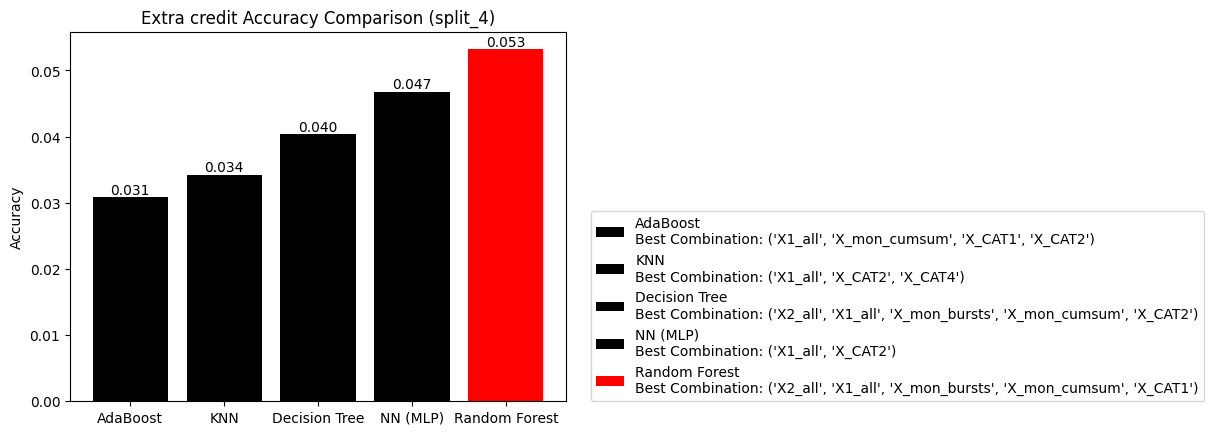

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Sort models by their best accuracy
sorted_models = sorted(models.keys(), key=lambda x: max(all_results[x].values()), reverse=False)

# Set colors
colors = ['red' if model_name == sorted_models[4] else 'black' for model_name in sorted_models]

# Plot the accuracies
fig, ax = plt.subplots()
bars = ax.bar(sorted_models, [all_results[model_name][max(all_results[model_name], key=all_results[model_name].get)] for model_name in sorted_models], color=colors)

# Annotate the bars with accuracy values
for bar, model_name in zip(bars, sorted_models):
    accuracy = all_results[model_name][max(all_results[model_name], key=all_results[model_name].get)]
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.3f}', ha='center', va='bottom')

# Set colors for text and labels
text_color = 'black'
ax.set_ylabel("Accuracy", color=text_color)
ax.set_title("Extra credit Accuracy Comparison (split_4)", color=text_color)


# Add a legend
legend_labels = [f"{model_name}\nBest Combination: {max(all_results[model_name], key=all_results[model_name].get)}" for model_name in sorted_models]
ax.legend(bars, legend_labels, loc='lower right')

# Move the legend to the right of the plot
ax.legend(bars, legend_labels, bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)

plt.show()